# Proton Energy Loss Correction using GEMC
 
FD proton inbending: [APSApril/ProtonMomentumCorrection3.ipynb](APSApril/ProtonMomentumCorrection3.ipynb)

FD proton outbending: [ProtonMomentumCorrection4.ipynb](ProtonMomentumCorrection4.ipynb)

CD protons: [ProtonMomentumCorrection5.ipynb](ProtonMomentumCorrection5.ipynb)

## Load Libs

In [1]:
from utils.epg import *
import matplotlib.pyplot as plt
from copy import copy
cmap = copy(plt.cm.get_cmap("jet"))
from scipy.optimize import least_squares
import numpy

In [2]:
degree = r"${}^{\circ}$"
GeV = "GeV"
GeV2 = "GeV"+r"${}^{2}$"
GeVc = "GeV/c"
GeVc2 = "(GeV/c)"+r"${}^{2}$"

In [3]:
import matplotlib
# initial settings
pgf_with_latex = {
        "figure.autolayout": True,
        "pgf.texsystem": "pdflatex",
        "text.usetex": True,            # use LaTeX to write all text
        "font.family": "sans-serif",         
        "font.sans-serif": "Helvetica",
        "font.size": 25,				# default font size
        "axes.labelsize": 24,			# x and y label size
        "axes.titlesize": 24,           # subfigure title size, i.e. title size when one figure
        "legend.fontsize": 12,			# legend size
        "xtick.labelsize": 23,			# x axis tick label size
        "ytick.labelsize": 23,			# y axis tick label 
        "figure.titlesize": 25,         # Figure title size, useful when you have multiple plots in one canvas.
        "pgf.preamble": r"\usepackage{xcolor}"     # xcolor for colours
}
matplotlib.rcParams.update(pgf_with_latex)

## Load data

In [4]:
job3111_0 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3111_CD_0.pkl")
job3111_1 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3111_CD_1.pkl")
job3111_2 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3111_CD_2.pkl")
job3111_3 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3111_CD_3.pkl")
job3111_4 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3111_CD_4.pkl")
job3111_5 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3111_CD_5.pkl")
job3111_6 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3111_CD_6.pkl")
job3111_7 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3111_CD_7.pkl")
job3111_8 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3111_CD_8.pkl")
job3111_9 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3111_CD_9.pkl")
job3111_10 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3111_CD_10.pkl")
job3111_11 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3111_CD_11.pkl")
job3111_12 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3111_CD_12.pkl")
job3111_13 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3111_CD_13.pkl")
job3111_14 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3111_CD_14.pkl")
job3111_15 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3111_CD_15.pkl")
job3111_16 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3111_CD_16.pkl")
job3111_17 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3111_CD_17.pkl")
job3111_18 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3111_CD_18.pkl")
job3111_19 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3111_CD_19.pkl")

In [5]:
outbending = pd.concat([globals()['job3111_'+str(i)] for i in range(20)])

In [6]:
job2942_0 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/2942_CD_0.pkl")
job2942_1 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/2942_CD_1.pkl")
job2942_2 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/2942_CD_2.pkl")
job2942_3 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/2942_CD_3.pkl")
job2942_4 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/2942_CD_4.pkl")
job2942_5 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/2942_CD_5.pkl")
job2942_6 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/2942_CD_6.pkl")
job2942_7 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/2942_CD_7.pkl")
job2942_8 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/2942_CD_8.pkl")
job2942_9 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/2942_CD_9.pkl")

In [7]:
job3057_0 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3057_CD_0.pkl")
job3057_1 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3057_CD_1.pkl")
job3057_2 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3057_CD_2.pkl")
job3057_3 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3057_CD_3.pkl")
job3057_4 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3057_CD_4.pkl")
job3057_5 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3057_CD_5.pkl")
job3057_6 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3057_CD_6.pkl")
job3057_7 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3057_CD_7.pkl")
job3057_8 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3057_CD_8.pkl")
job3057_9 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/3057_CD_9.pkl")

In [8]:
job2942 = pd.concat([globals()['job2942_'+str(i)] for i in range(10)])
job3057 = pd.concat([globals()['job3057_'+str(i)] for i in range(10)])
inbending = pd.concat([job2942, job3057])

In [9]:
inbendingCD = copy(inbending.loc[inbending.Psector>7, :])
inbendingFD = copy(inbending.loc[inbending.Psector<7, :])
outbendingCD = copy(outbending.loc[outbending.Psector>7, :])
outbendingFD = copy(outbending.loc[outbending.Psector<7, :])

In [ ]:
inbendingCD

In [97]:
inbendingCD_ = copy(inbendingCD)
outbendingCD_ = copy(outbendingCD)

In [17]:
def correction(x, t):
    x0, x1 = x
    return x0 + x1/t

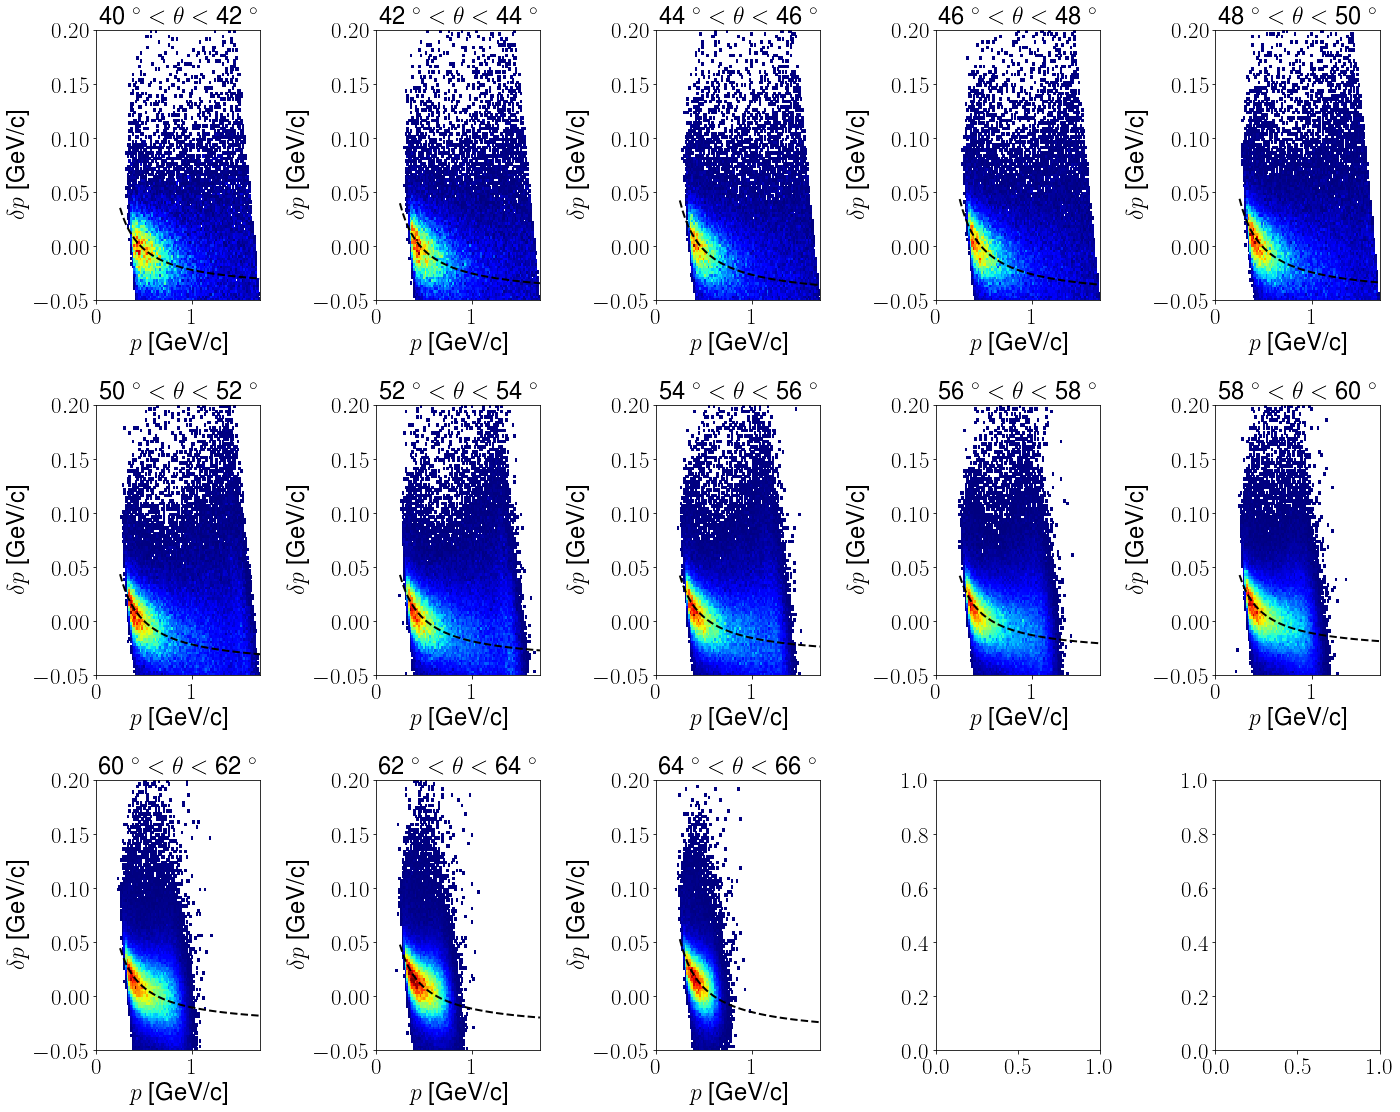

In [102]:
#coneAngle 5 deg
inbendingCD = copy(inbendingCD_)
theta = np.linspace(0, 14, 15)*2+41
const_CD = 1.93686914 - 0.116288824*theta + 0.00223685833*theta**2 - 1.40771969 * 10**(-5)*theta**3
coeff_CD = -0.738047800 + 0.0443343685*theta - 8.50985972*10**(-4)*theta*theta + 5.36810280 * 10**(-6) * theta**3
params_p = np.array([const_CD, coeff_CD]).T
fig, axs = plt.subplots(3,5, figsize=(20,16))
for row in range(3):
    for col in range(5):
        ind =col+5*row
        if ind >12:
            continue
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (inbendingCD.Ptheta >= 2*(ind)+40) & (inbendingCD.Ptheta < 2*(ind+1)+40)
#         axs[row, col].hist2d(inbendingCD.loc[thetaCond, "Pp"], inbendingCD.loc[thetaCond, "GenPp"] - inbendingCD.loc[thetaCond, "Pp"], bins = [np.linspace(0, 1.7, 101), np.linspace(-0.05, 0.2, 101)], cmap = cmap, cmin =1)
        axs[row, col].hist2d(inbendingCD.loc[thetaCond, "Pp"], inbendingCD.loc[thetaCond, "GenPp"] - inbendingCD.loc[thetaCond, "Pp"], bins = [np.linspace(0, 1.7, 101), np.linspace(-0.05, 0.2, 101)], cmap = cmap, cmin =1)
        param = params_p[ind]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.25, 1.7, 51), correction(param, np.linspace(0.25, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p$" + " ["+GeVc+"]")
        axs[row, col].set_title(str(2*ind+40)+" "+degree + r" $<\theta<$ " + str(2*(ind+1)+40)+" "+degree)
plt.tight_layout()
plt.savefig("protonCD_inb_mom_5deg.pdf")

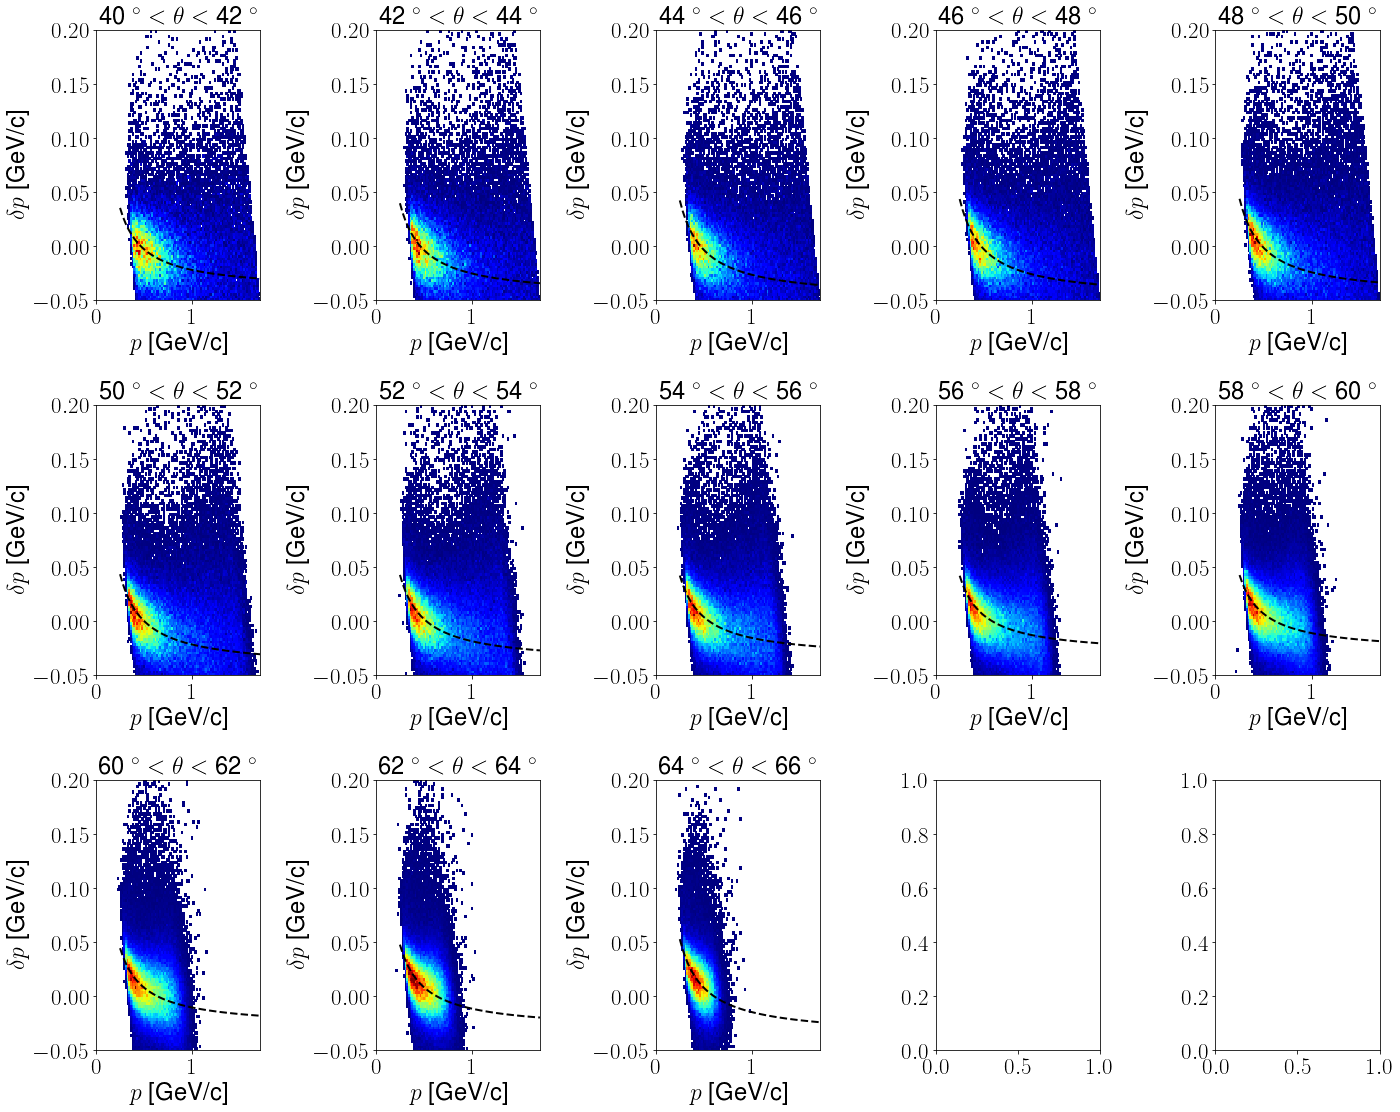

In [103]:
#coneAngle 10 deg
inbendingCD = copy(inbendingCD_[inbendingCD_.coneAngle>10])
theta = np.linspace(0, 14, 15)*2+41
const_CD = 1.93686914 - 0.116288824*theta + 0.00223685833*theta**2 - 1.40771969 * 10**(-5)*theta**3
coeff_CD = -0.738047800 + 0.0443343685*theta - 8.50985972*10**(-4)*theta*theta + 5.36810280 * 10**(-6) * theta**3
params_p = np.array([const_CD, coeff_CD]).T
fig, axs = plt.subplots(3,5, figsize=(20,16))
for row in range(3):
    for col in range(5):
        ind =col+5*row
        if ind >12:
            continue
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (inbendingCD.Ptheta >= 2*(ind)+40) & (inbendingCD.Ptheta < 2*(ind+1)+40)
#         axs[row, col].hist2d(inbendingCD.loc[thetaCond, "Pp"], inbendingCD.loc[thetaCond, "GenPp"] - inbendingCD.loc[thetaCond, "Pp"], bins = [np.linspace(0, 1.7, 101), np.linspace(-0.05, 0.2, 101)], cmap = cmap, cmin =1)
        axs[row, col].hist2d(inbendingCD.loc[thetaCond, "Pp"], inbendingCD.loc[thetaCond, "GenPp"] - inbendingCD.loc[thetaCond, "Pp"], bins = [np.linspace(0, 1.7, 101), np.linspace(-0.05, 0.2, 101)], cmap = cmap, cmin =1)
        param = params_p[ind]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.25, 1.7, 51), correction(param, np.linspace(0.25, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p$" + " ["+GeVc+"]")
        axs[row, col].set_title(str(2*ind+40)+" "+degree + r" $<\theta<$ " + str(2*(ind+1)+40)+" "+degree)
plt.tight_layout()
plt.savefig("protonCD_inb_mom_10deg.pdf")

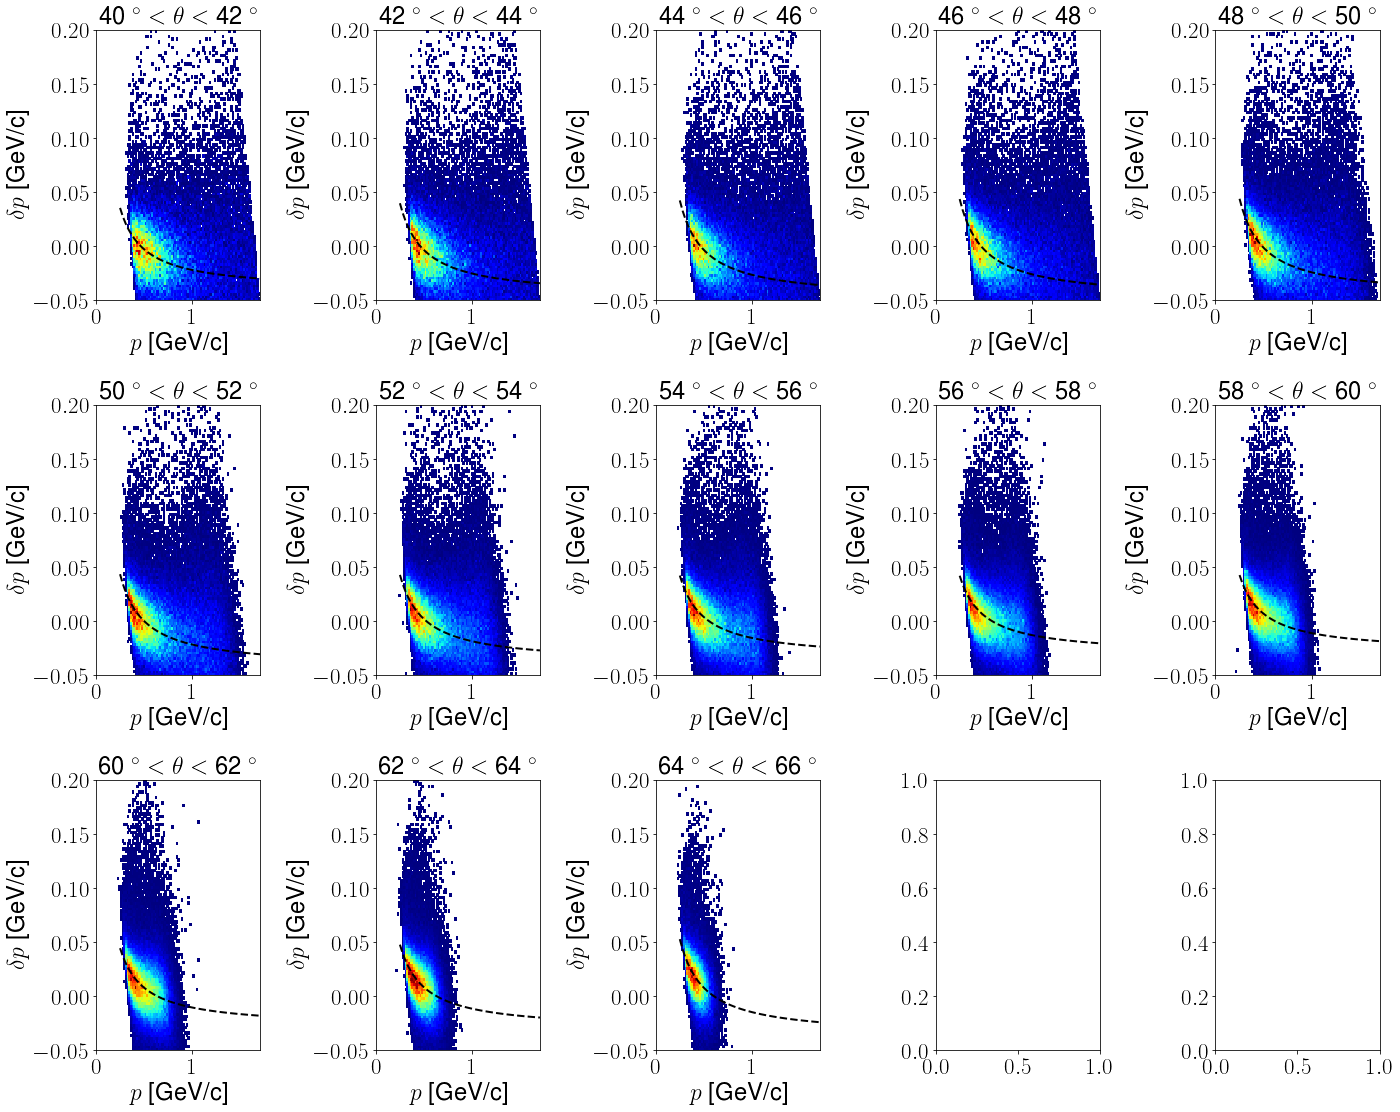

In [104]:
#coneAngle 15 deg
inbendingCD = copy(inbendingCD_[inbendingCD_.coneAngle>15])
theta = np.linspace(0, 14, 15)*2+41
const_CD = 1.93686914 - 0.116288824*theta + 0.00223685833*theta**2 - 1.40771969 * 10**(-5)*theta**3
coeff_CD = -0.738047800 + 0.0443343685*theta - 8.50985972*10**(-4)*theta*theta + 5.36810280 * 10**(-6) * theta**3
params_p = np.array([const_CD, coeff_CD]).T
fig, axs = plt.subplots(3,5, figsize=(20,16))
for row in range(3):
    for col in range(5):
        ind =col+5*row
        if ind >12:
            continue
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (inbendingCD.Ptheta >= 2*(ind)+40) & (inbendingCD.Ptheta < 2*(ind+1)+40)
#         axs[row, col].hist2d(inbendingCD.loc[thetaCond, "Pp"], inbendingCD.loc[thetaCond, "GenPp"] - inbendingCD.loc[thetaCond, "Pp"], bins = [np.linspace(0, 1.7, 101), np.linspace(-0.05, 0.2, 101)], cmap = cmap, cmin =1)
        axs[row, col].hist2d(inbendingCD.loc[thetaCond, "Pp"], inbendingCD.loc[thetaCond, "GenPp"] - inbendingCD.loc[thetaCond, "Pp"], bins = [np.linspace(0, 1.7, 101), np.linspace(-0.05, 0.2, 101)], cmap = cmap, cmin =1)
        param = params_p[ind]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.25, 1.7, 51), correction(param, np.linspace(0.25, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p$" + " ["+GeVc+"]")
        axs[row, col].set_title(str(2*ind+40)+" "+degree + r" $<\theta<$ " + str(2*(ind+1)+40)+" "+degree)
plt.tight_layout()
plt.savefig("protonCD_inb_mom_15deg.pdf")

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


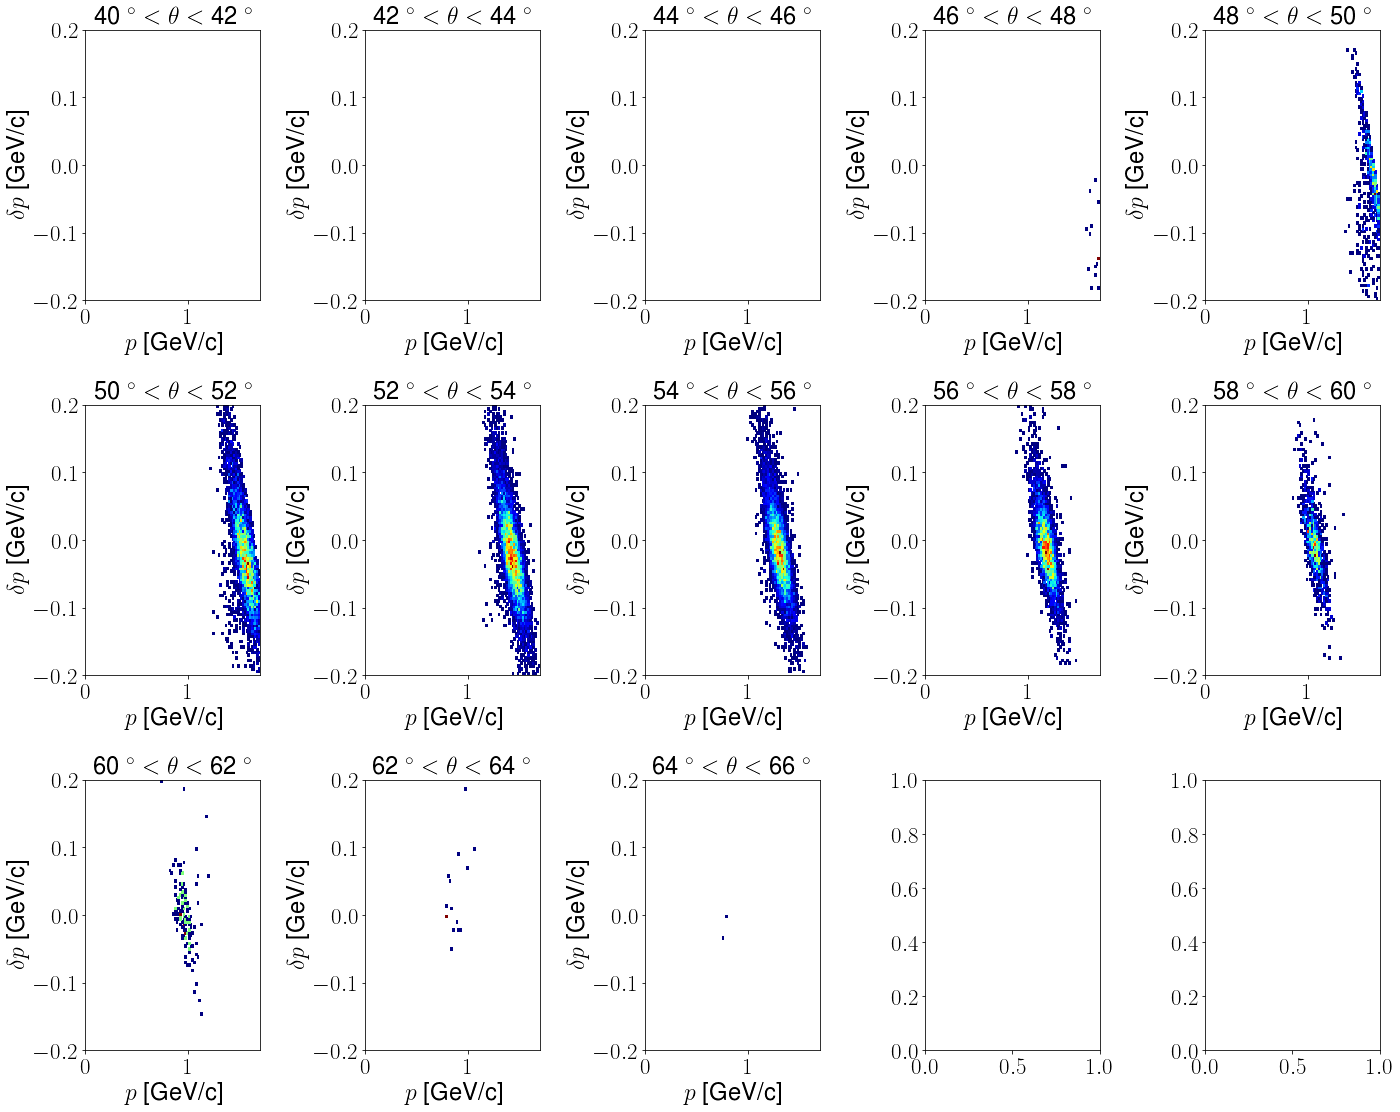

In [143]:
#coneAngle 15 deg
inbendingCD = copy(inbendingCD_[(inbendingCD_.coneAngle>5) & (inbendingCD_.coneAngle<10)])
theta = np.linspace(0, 14, 15)*2+41
const_CD = 1.93686914 - 0.116288824*theta + 0.00223685833*theta**2 - 1.40771969 * 10**(-5)*theta**3
coeff_CD = -0.738047800 + 0.0443343685*theta - 8.50985972*10**(-4)*theta*theta + 5.36810280 * 10**(-6) * theta**3
params_p = np.array([const_CD, coeff_CD]).T
fig, axs = plt.subplots(3,5, figsize=(20,16))
for row in range(3):
    for col in range(5):
        ind =col+5*row
        if ind >12:
            continue
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (inbendingCD.Ptheta >= 2*(ind)+40) & (inbendingCD.Ptheta < 2*(ind+1)+40)
#         axs[row, col].hist2d(inbendingCD.loc[thetaCond, "Pp"], inbendingCD.loc[thetaCond, "GenPp"] - inbendingCD.loc[thetaCond, "Pp"], bins = [np.linspace(0, 1.7, 101), np.linspace(-0.05, 0.2, 101)], cmap = cmap, cmin =1)
        axs[row, col].hist2d(inbendingCD.loc[thetaCond, "Pp"], inbendingCD.loc[thetaCond, "GenPp"] - inbendingCD.loc[thetaCond, "Pp"], bins = [np.linspace(0, 1.7, 101), np.linspace(-0.2, 0.2, 101)], cmap = cmap, cmin =1)
#         param = params_p[ind]
#         if ind == 11:
#             param = params[10]
#         axs[row, col].plot(np.linspace(0.25, 1.7, 51), correction(param, np.linspace(0.25, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p$" + " ["+GeVc+"]")
        axs[row, col].set_title(str(2*ind+40)+" "+degree + r" $<\theta<$ " + str(2*(ind+1)+40)+" "+degree)
plt.tight_layout()
plt.savefig("protonCD_inb_mom_5deg_10deg.pdf")

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


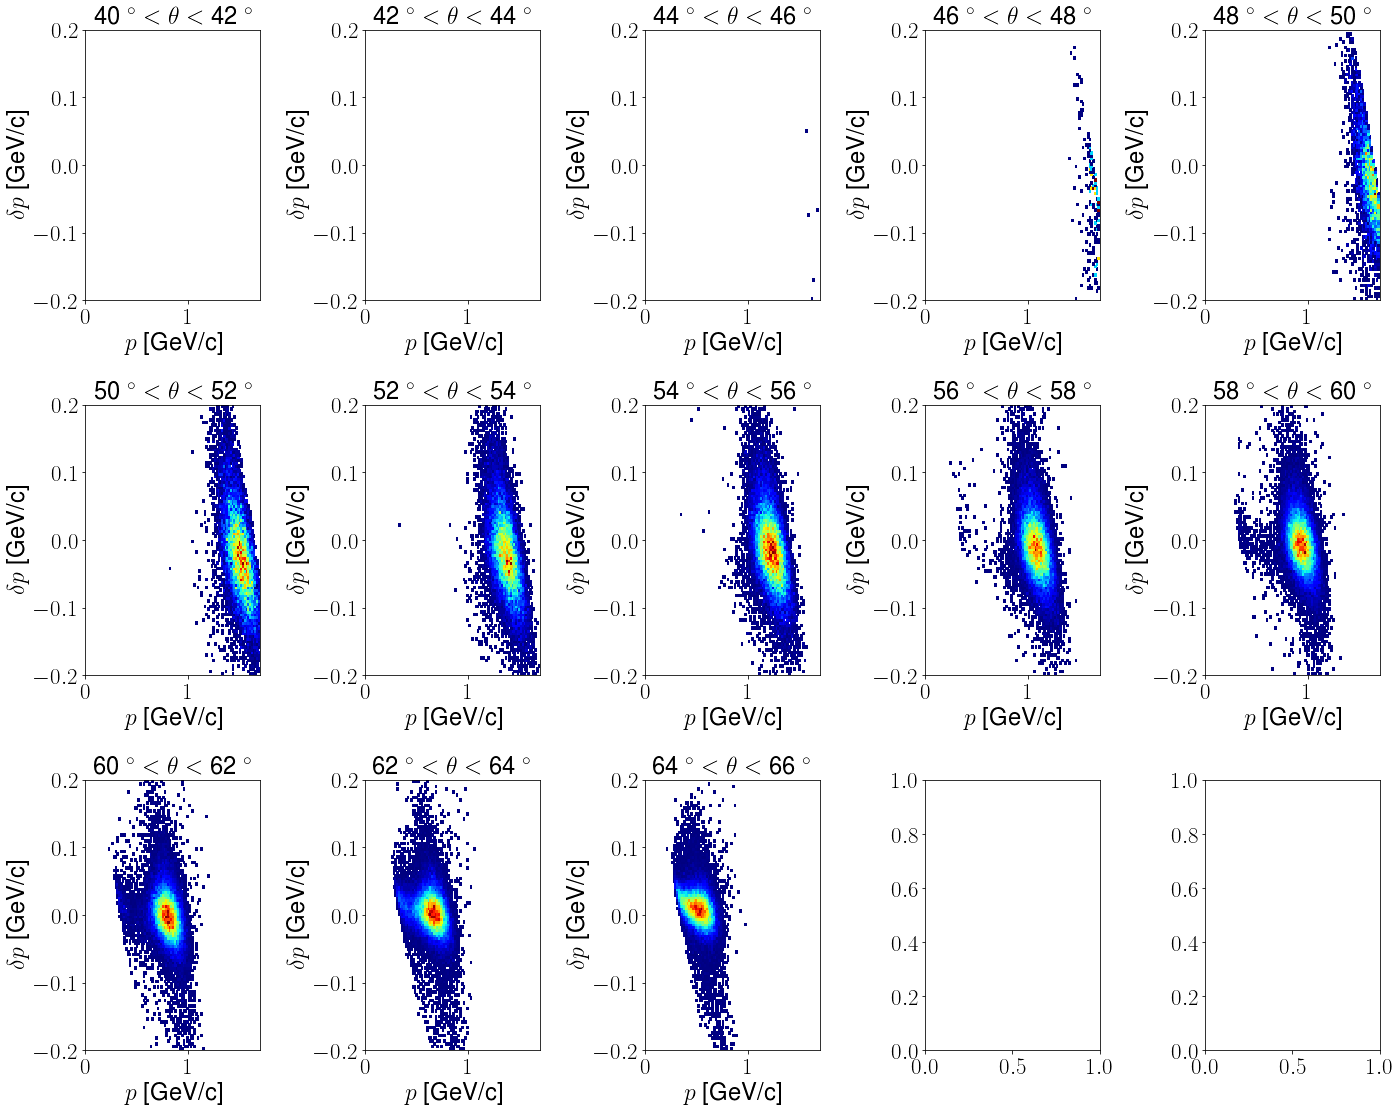

In [142]:
#coneAngle 15 deg
inbendingCD = copy(inbendingCD_[(inbendingCD_.coneAngle>5) & (inbendingCD_.coneAngle<15)])
theta = np.linspace(0, 14, 15)*2+41
const_CD = 1.93686914 - 0.116288824*theta + 0.00223685833*theta**2 - 1.40771969 * 10**(-5)*theta**3
coeff_CD = -0.738047800 + 0.0443343685*theta - 8.50985972*10**(-4)*theta*theta + 5.36810280 * 10**(-6) * theta**3
params_p = np.array([const_CD, coeff_CD]).T
fig, axs = plt.subplots(3,5, figsize=(20,16))
for row in range(3):
    for col in range(5):
        ind =col+5*row
        if ind >12:
            continue
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (inbendingCD.Ptheta >= 2*(ind)+40) & (inbendingCD.Ptheta < 2*(ind+1)+40)
#         axs[row, col].hist2d(inbendingCD.loc[thetaCond, "Pp"], inbendingCD.loc[thetaCond, "GenPp"] - inbendingCD.loc[thetaCond, "Pp"], bins = [np.linspace(0, 1.7, 101), np.linspace(-0.05, 0.2, 101)], cmap = cmap, cmin =1)
        axs[row, col].hist2d(inbendingCD.loc[thetaCond, "Pp"], inbendingCD.loc[thetaCond, "GenPp"] - inbendingCD.loc[thetaCond, "Pp"], bins = [np.linspace(0, 1.7, 101), np.linspace(-0.2, 0.2, 101)], cmap = cmap, cmin =1)
#         param = params_p[ind]
#         if ind == 11:
#             param = params[10]
#         axs[row, col].plot(np.linspace(0.25, 1.7, 51), correction(param, np.linspace(0.25, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p$" + " ["+GeVc+"]")
        axs[row, col].set_title(str(2*ind+40)+" "+degree + r" $<\theta<$ " + str(2*(ind+1)+40)+" "+degree)
plt.tight_layout()
plt.savefig("protonCD_inb_mom_5deg_15deg.pdf")

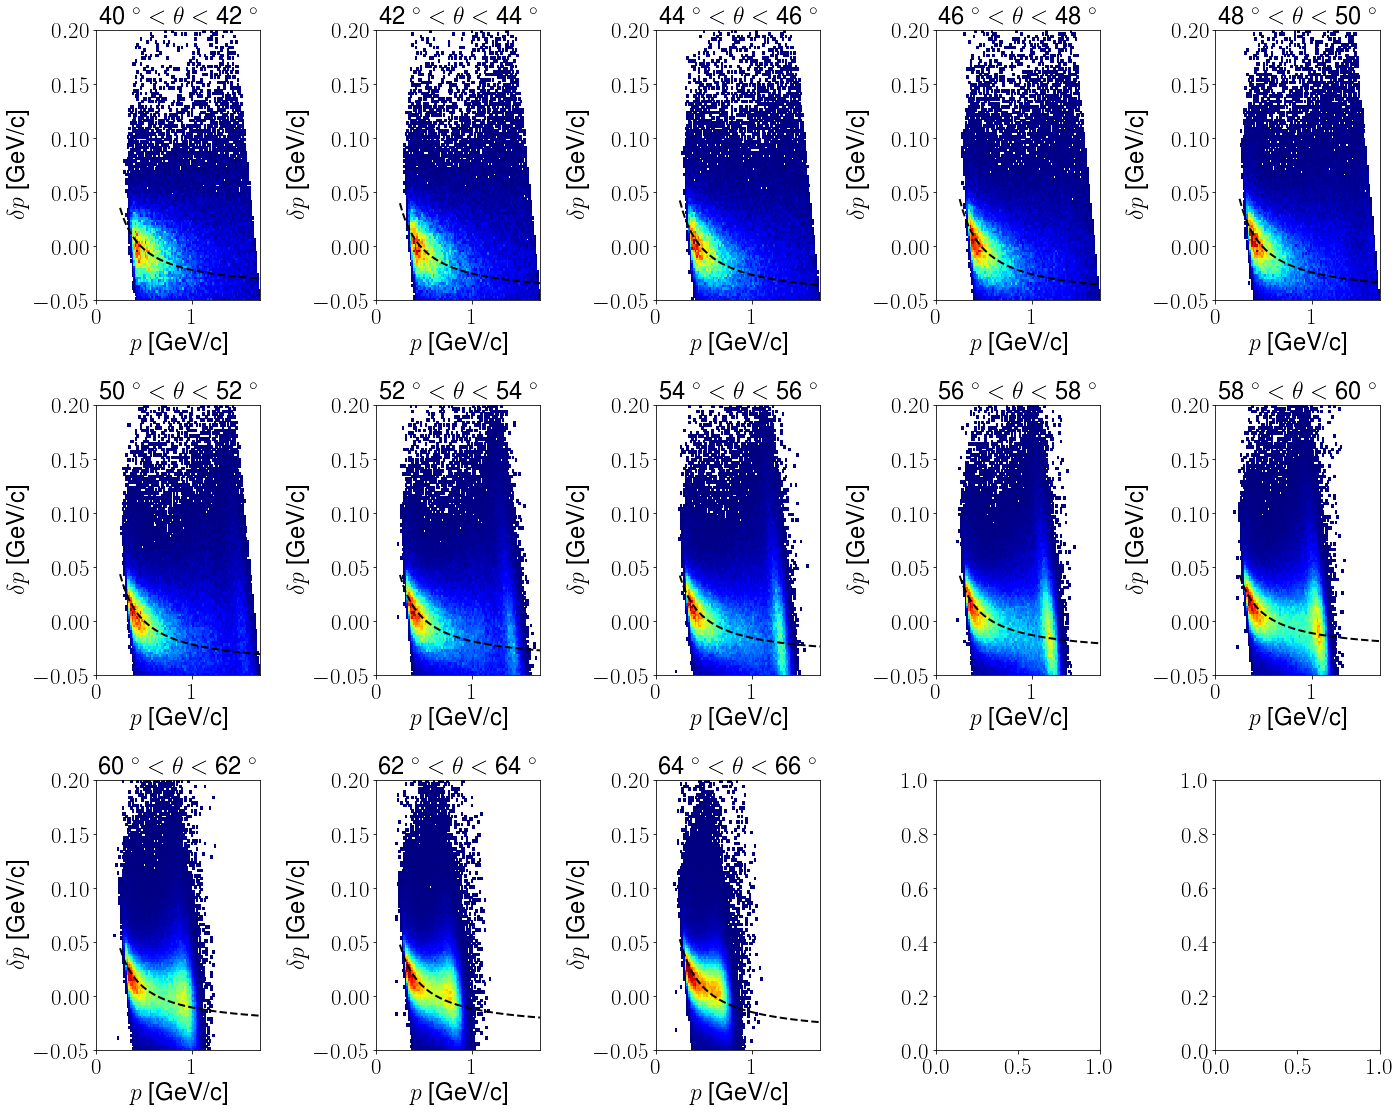

In [105]:
outbendingCD = copy(outbendingCD_)
theta = np.linspace(0, 14, 15)*2+41
const_CD = 1.93686914 - 0.116288824*theta + 0.00223685833*theta**2 - 1.40771969 * 10**(-5)*theta**3
coeff_CD = -0.738047800 + 0.0443343685*theta - 8.50985972*10**(-4)*theta*theta + 5.36810280 * 10**(-6) * theta**3
params_p = np.array([const_CD, coeff_CD]).T
fig, axs = plt.subplots(3,5, figsize=(20,16))
for row in range(3):
    for col in range(5):
        ind =col+5*row
        if ind >12:
            continue
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (outbendingCD.Ptheta >= 2*(ind)+40) & (outbendingCD.Ptheta < 2*(ind+1)+40)
        axs[row, col].hist2d(outbendingCD.loc[thetaCond, "Pp"], outbendingCD.loc[thetaCond, "GenPp"] - outbendingCD.loc[thetaCond, "Pp"], bins = [np.linspace(0, 1.7, 101), np.linspace(-0.05, 0.2, 101)], cmap = cmap, cmin =1)
        param = params_p[ind]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.25, 1.7, 51), correction(param, np.linspace(0.25, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p$" + " ["+GeVc+"]")
        axs[row, col].set_title(str(2*ind+40)+" "+degree + r" $<\theta<$ " + str(2*(ind+1)+40)+" "+degree)
plt.tight_layout()
plt.savefig("protonCD_outb_mom_5deg.pdf")

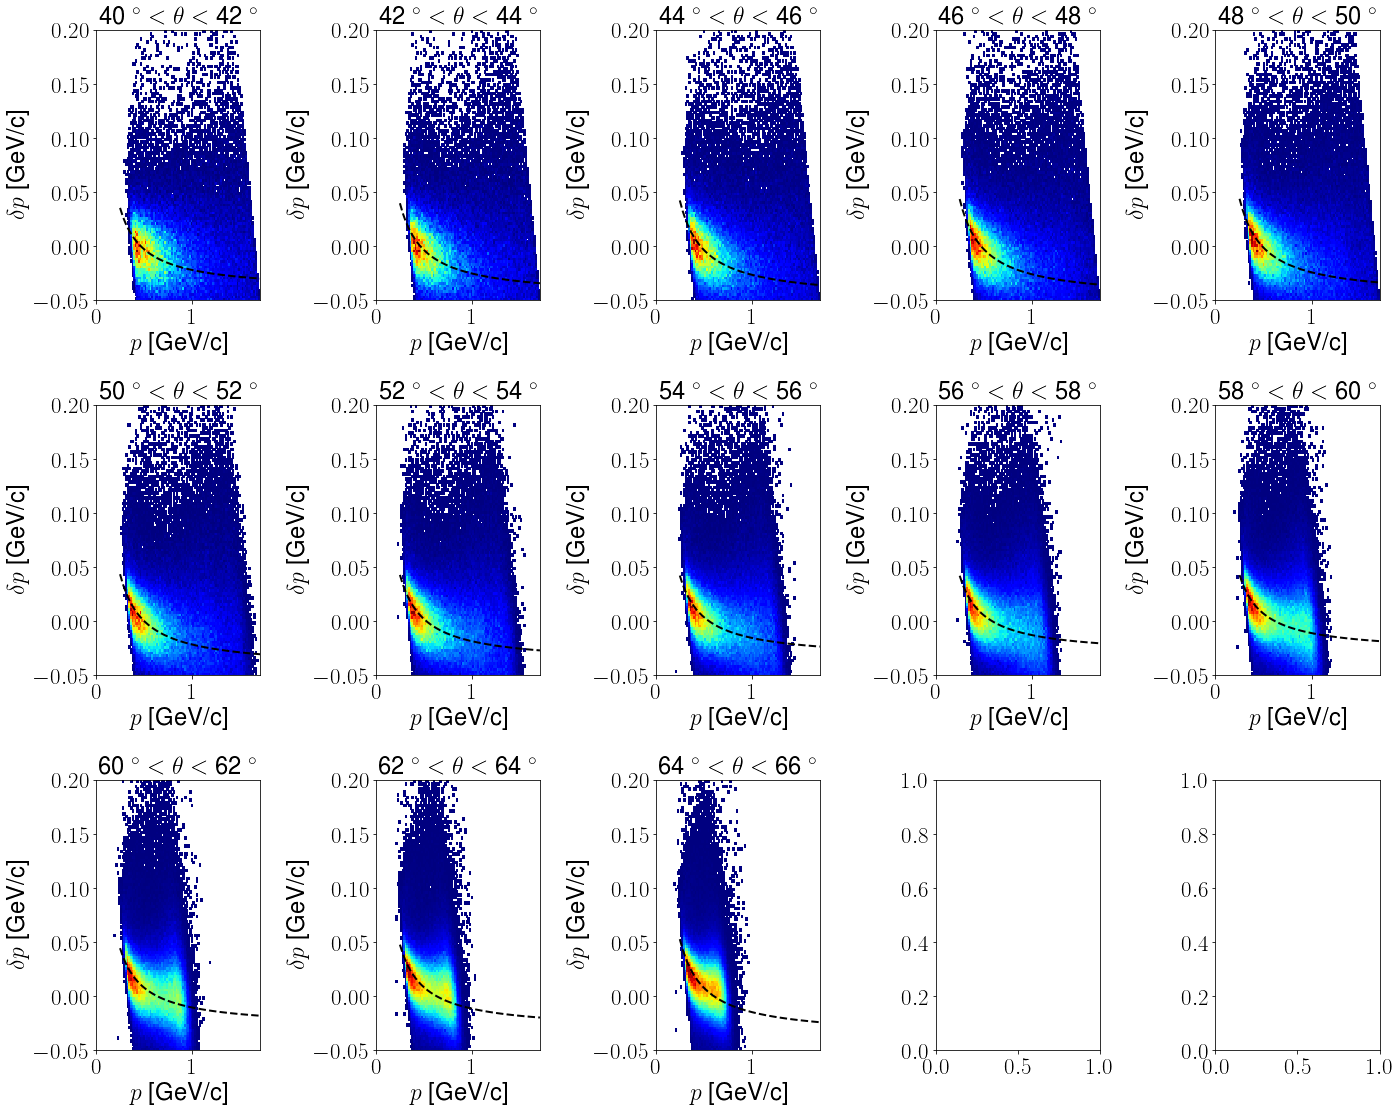

In [106]:
outbendingCD = copy(outbendingCD_[outbendingCD_.coneAngle>10])
theta = np.linspace(0, 14, 15)*2+41
const_CD = 1.93686914 - 0.116288824*theta + 0.00223685833*theta**2 - 1.40771969 * 10**(-5)*theta**3
coeff_CD = -0.738047800 + 0.0443343685*theta - 8.50985972*10**(-4)*theta*theta + 5.36810280 * 10**(-6) * theta**3
params_p = np.array([const_CD, coeff_CD]).T
fig, axs = plt.subplots(3,5, figsize=(20,16))
for row in range(3):
    for col in range(5):
        ind =col+5*row
        if ind >12:
            continue
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (outbendingCD.Ptheta >= 2*(ind)+40) & (outbendingCD.Ptheta < 2*(ind+1)+40)
        axs[row, col].hist2d(outbendingCD.loc[thetaCond, "Pp"], outbendingCD.loc[thetaCond, "GenPp"] - outbendingCD.loc[thetaCond, "Pp"], bins = [np.linspace(0, 1.7, 101), np.linspace(-0.05, 0.2, 101)], cmap = cmap, cmin =1)
        param = params_p[ind]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.25, 1.7, 51), correction(param, np.linspace(0.25, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p$" + " ["+GeVc+"]")
        axs[row, col].set_title(str(2*ind+40)+" "+degree + r" $<\theta<$ " + str(2*(ind+1)+40)+" "+degree)
plt.tight_layout()
plt.savefig("protonCD_outb_mom_10deg.pdf")

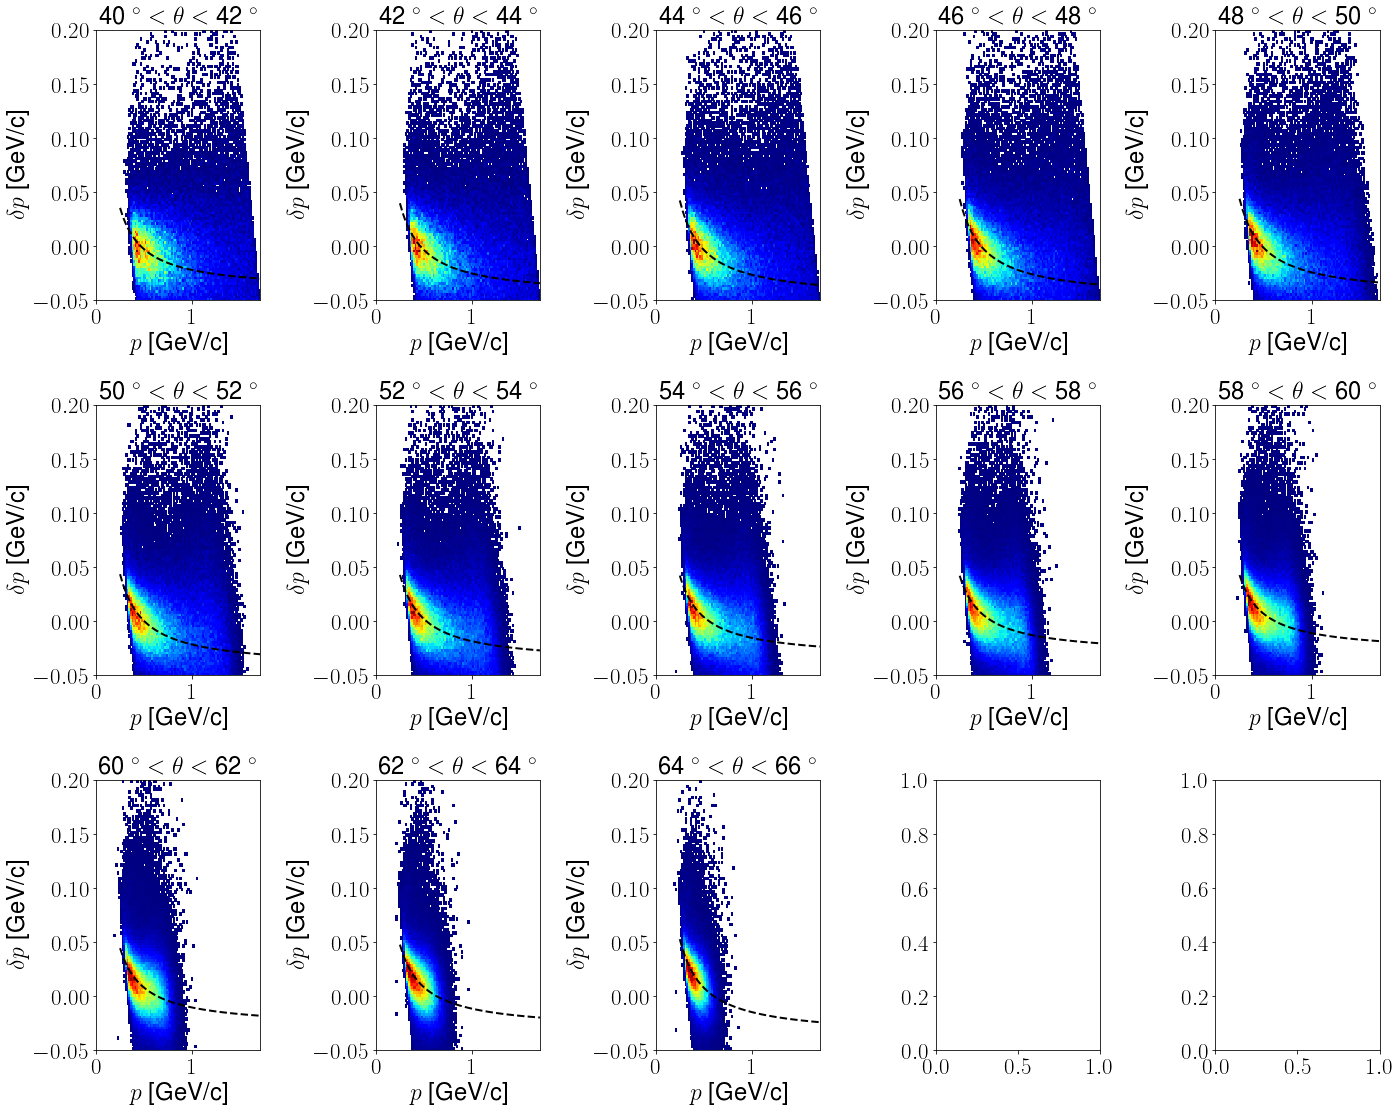

In [119]:
outbendingCD = outbendingCD_[outbendingCD_.coneAngle>15]
theta = np.linspace(0, 14, 15)*2+41
const_CD = 1.93686914 - 0.116288824*theta + 0.00223685833*theta**2 - 1.40771969 * 10**(-5)*theta**3
coeff_CD = -0.738047800 + 0.0443343685*theta - 8.50985972*10**(-4)*theta*theta + 5.36810280 * 10**(-6) * theta**3
params_p = np.array([const_CD, coeff_CD]).T
fig, axs = plt.subplots(3,5, figsize=(20,16))
for row in range(3):
    for col in range(5):
        ind =col+5*row
        if ind >12:
            continue
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (outbendingCD.Ptheta >= 2*(ind)+40) & (outbendingCD.Ptheta < 2*(ind+1)+40)
        axs[row, col].hist2d(outbendingCD.loc[thetaCond, "Pp"], outbendingCD.loc[thetaCond, "GenPp"] - outbendingCD.loc[thetaCond, "Pp"], bins = [np.linspace(0, 1.7, 101), np.linspace(-0.05, 0.2, 101)], cmap = cmap, cmin =1)
        param = params_p[ind]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.25, 1.7, 51), correction(param, np.linspace(0.25, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p$" + " ["+GeVc+"]")
        axs[row, col].set_title(str(2*ind+40)+" "+degree + r" $<\theta<$ " + str(2*(ind+1)+40)+" "+degree)
plt.tight_layout()
plt.savefig("protonCD_outb_mom_15deg.pdf")

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


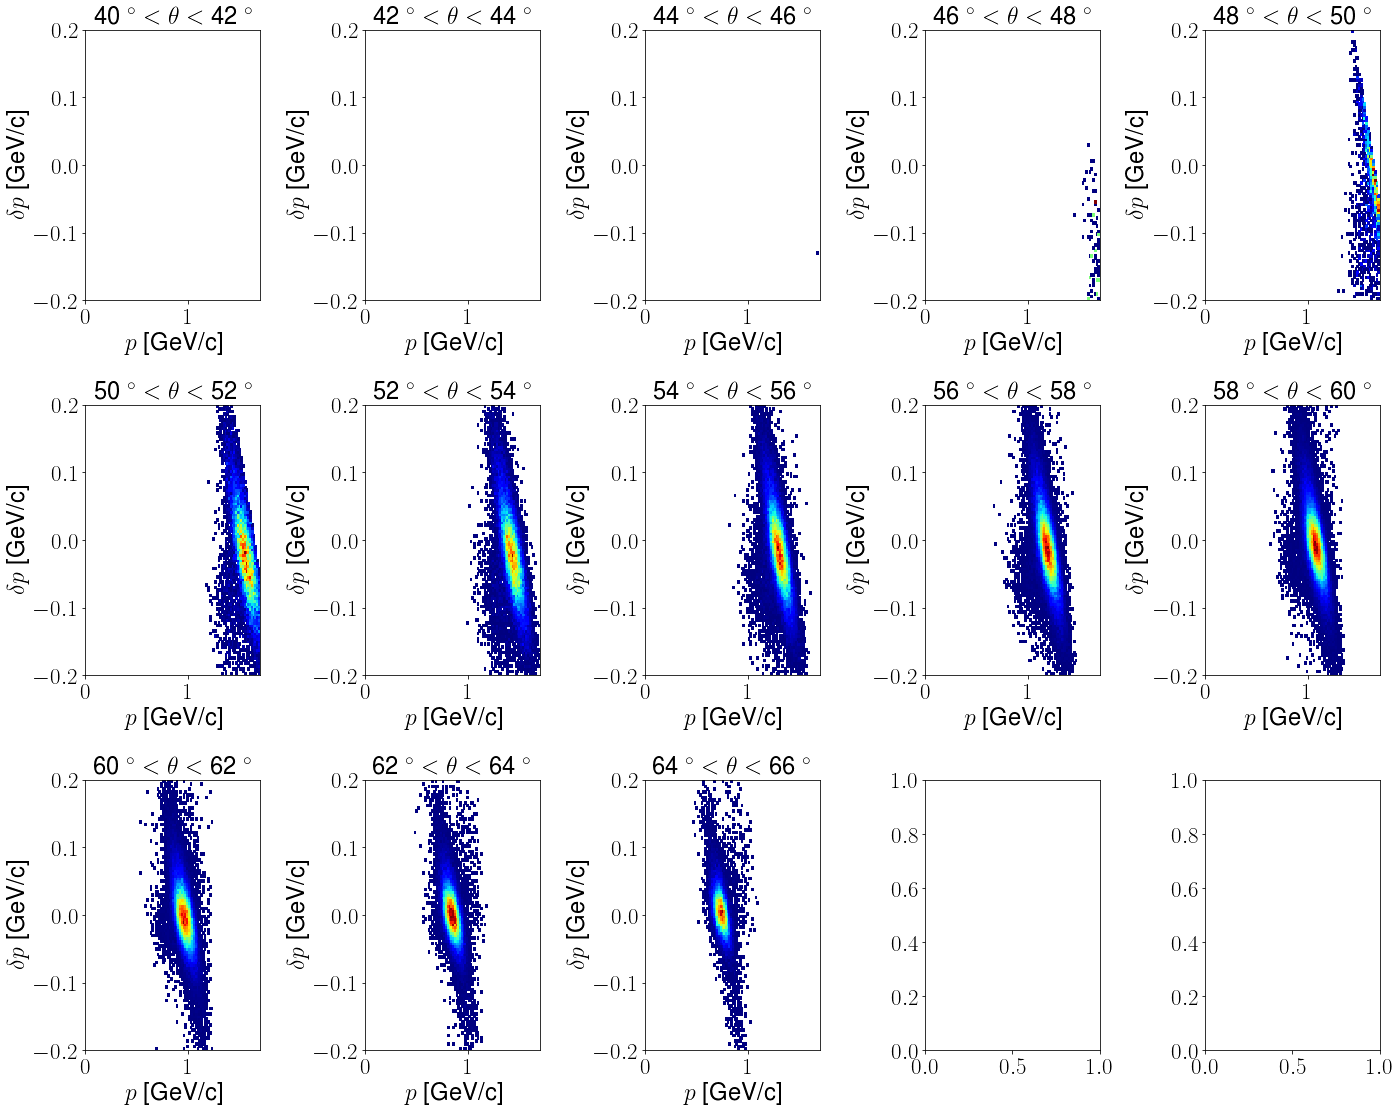

In [140]:
#coneAngle 5–10 deg
outbendingCD = copy(outbendingCD_[(outbendingCD_.coneAngle>5) & (outbendingCD_.coneAngle<10)])
theta = np.linspace(0, 14, 15)*2+41
const_CD = 1.93686914 - 0.116288824*theta + 0.00223685833*theta**2 - 1.40771969 * 10**(-5)*theta**3
coeff_CD = -0.738047800 + 0.0443343685*theta - 8.50985972*10**(-4)*theta*theta + 5.36810280 * 10**(-6) * theta**3
params_p = np.array([const_CD, coeff_CD]).T
fig, axs = plt.subplots(3,5, figsize=(20,16))
for row in range(3):
    for col in range(5):
        ind =col+5*row
        if ind >12:
            continue
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (outbendingCD.Ptheta >= 2*(ind)+40) & (outbendingCD.Ptheta < 2*(ind+1)+40)
        axs[row, col].hist2d(outbendingCD.loc[thetaCond, "Pp"], outbendingCD.loc[thetaCond, "GenPp"] - outbendingCD.loc[thetaCond, "Pp"], bins = [np.linspace(0, 1.7, 101), np.linspace(-0.2, 0.2, 101)], cmap = cmap, cmin =1)
#         param = params_p[ind]
#         if ind == 11:
#             param = params[10]
#         axs[row, col].plot(np.linspace(0.25, 1.7, 51), correction(param, np.linspace(0.25, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p$" + " ["+GeVc+"]")
        axs[row, col].set_title(str(2*ind+40)+" "+degree + r" $<\theta<$ " + str(2*(ind+1)+40)+" "+degree)
plt.tight_layout()
plt.savefig("protonCD_outb_mom_5deg_10deg.pdf")

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


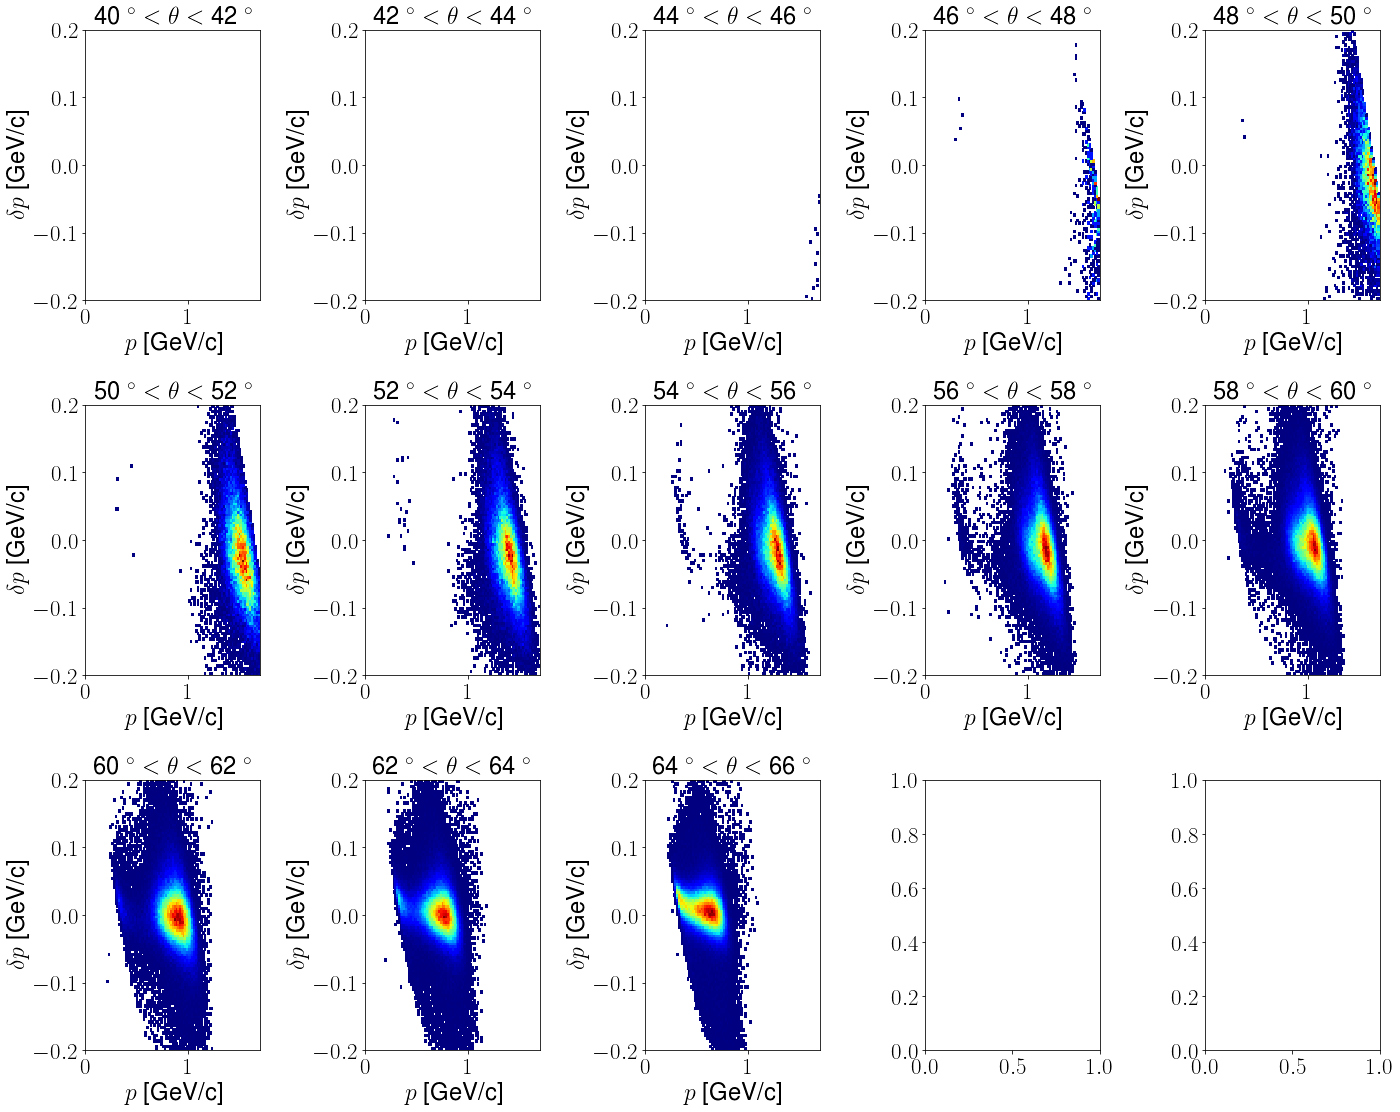

In [141]:
#coneAngle 5–15 deg
outbendingCD = copy(outbendingCD_[(outbendingCD_.coneAngle>5) & (outbendingCD_.coneAngle<15)])
theta = np.linspace(0, 14, 15)*2+41
const_CD = 1.93686914 - 0.116288824*theta + 0.00223685833*theta**2 - 1.40771969 * 10**(-5)*theta**3
coeff_CD = -0.738047800 + 0.0443343685*theta - 8.50985972*10**(-4)*theta*theta + 5.36810280 * 10**(-6) * theta**3
params_p = np.array([const_CD, coeff_CD]).T
fig, axs = plt.subplots(3,5, figsize=(20,16))
for row in range(3):
    for col in range(5):
        ind =col+5*row
        if ind >12:
            continue
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (outbendingCD.Ptheta >= 2*(ind)+40) & (outbendingCD.Ptheta < 2*(ind+1)+40)
        axs[row, col].hist2d(outbendingCD.loc[thetaCond, "Pp"], outbendingCD.loc[thetaCond, "GenPp"] - outbendingCD.loc[thetaCond, "Pp"], bins = [np.linspace(0, 1.7, 101), np.linspace(-0.2, 0.2, 101)], cmap = cmap, cmin =1)
#         param = params_p[ind]
#         if ind == 11:
#             param = params[10]
#         axs[row, col].plot(np.linspace(0.25, 1.7, 51), correction(param, np.linspace(0.25, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p$" + " ["+GeVc+"]")
        axs[row, col].set_title(str(2*ind+40)+" "+degree + r" $<\theta<$ " + str(2*(ind+1)+40)+" "+degree)
plt.tight_layout()
plt.savefig("protonCD_outb_mom_5deg_15deg.pdf")

In [135]:
inbendingCD = copy(inbendingCD_)
outbendingCD = copy(outbendingCD_)

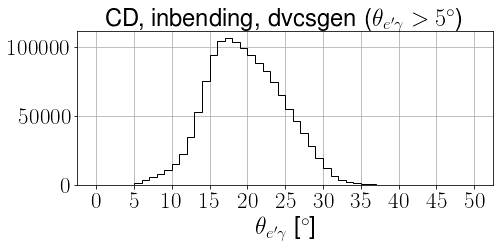

In [136]:
plt.rcParams["figure.figsize"] = (7.5,4)
inbendingCD.coneAngle.hist(bins = np.linspace(0, 50, 51), histtype = 'step', edgecolor = 'k')
plt.xticks(np.linspace(0, 50, 11))
plt.title("CD, inbending, dvcsgen ("+r"$\theta_{e'\gamma} > 5$"+degree+")")
plt.xlabel(r"$\theta_{e'\gamma}$"+" ["+degree+"]")
plt.savefig("inbendingCDconeAngle.pdf")

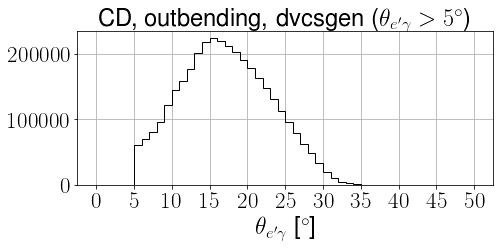

In [137]:
plt.rcParams["figure.figsize"] = (7.5,4)
outbendingCD.coneAngle.hist(bins = np.linspace(0, 50, 51), histtype = 'step', edgecolor = 'k')
plt.xticks(np.linspace(0, 50, 11))
plt.title("CD, outbending, dvcsgen ("+r"$\theta_{e'\gamma} > 5$"+degree+")")
plt.xlabel(r"$\theta_{e'\gamma}$"+" ["+degree+"]")
# plt.tight_layout()
plt.savefig("outbendingCDconeAngle.pdf")